# TITANIC

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns

/Users/Cemal/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv('./train.csv')
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [3]:
data.drop('Name', axis=1, inplace = True)

In [4]:
print(data.head(1))

   PassengerId  Survived  Pclass   Sex   Age  SibSp  Parch     Ticket  Fare  \
0            1         0       3  male  22.0      1      0  A/5 21171  7.25   

  Cabin Embarked  
0   NaN        S  


In [5]:
print(data.shape[0])

891


In [6]:
data_types = data.dtypes
print(data_types)

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [7]:
data.isnull().values.any()

True

/Users/Cemal/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  app.launch_new_instance()


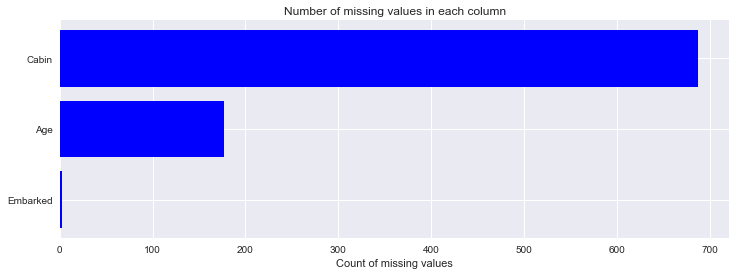

In [8]:
missing_df = data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,4))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

In [9]:
print(missing_df)

   column_name  missing_count
10    Embarked              2
4          Age            177
9        Cabin            687


In [10]:
print(set(data['Cabin'].values))

{nan, 'C128', 'C91', 'A6', 'A7', 'A20', 'C90', 'B39', 'E34', 'D26', 'C2', 'D9', 'C123', 'D30', 'B3', 'E31', 'C86', 'B71', 'C49', 'C47', 'E58', 'C93', 'D45', 'E49', 'B96 B98', 'B51 B53 B55', 'C106', 'B50', 'B58 B60', 'C103', 'C92', 'E8', 'C23 C25 C27', 'C65', 'C62 C64', 'A10', 'B35', 'C99', 'C7', 'C85', 'C83', 'B80', 'C30', 'E36', 'D36', 'E40', 'C111', 'D35', 'E33', 'B94', 'D46', 'F33', 'C125', 'A34', 'E121', 'D6', 'C45', 'B19', 'F38', 'A5', 'D47', 'E67', 'D17', 'C50', 'B37', 'D56', 'B30', 'F4', 'T', 'C70', 'C110', 'C124', 'B77', 'F2', 'C54', 'E68', 'E77', 'C95', 'A32', 'D19', 'B101', 'B18', 'G6', 'A36', 'C78', 'A24', 'D37', 'B4', 'B69', 'D21', 'D48', 'B73', 'C52', 'A19', 'F G63', 'E101', 'D', 'B42', 'D7', 'D11', 'E10', 'B41', 'D33', 'A31', 'D49', 'D10 D12', 'B5', 'B28', 'C68', 'C22 C26', 'D50', 'E25', 'B49', 'E63', 'C126', 'F E69', 'E24', 'B82 B84', 'C148', 'E50', 'C82', 'D15', 'E38', 'C118', 'A16', 'B20', 'E17', 'D28', 'B78', 'B22', 'A23', 'E46', 'B57 B59 B63 B66', 'D20', 'C32', 'B38'

In [11]:
print(set(data['SibSp'].values))

{0, 1, 2, 3, 4, 5, 8}


{0, 1, 2, 3, 4, 5}
{0.75, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 28.5, 31.0, 32.0, 30.0, 34.0, 35.0, 33.0, 37.0, 38.0, 39.0, 40.0, 32.5, 42.0, 36.5, 40.5, 45.0, 46.0, 47.0, 44.0, 49.0, 50.0, 51.0, 45.5, 52.0, 54.0, 55.0, 55.5, 56.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 70.5, 71.0, 14.5, 70.0, 74.0, 80.0, 20.5, 23.5, 24.5, 0.41999999999999998, 30.5, 34.5, 36.0, 41.0, 43.0, 48.0, 0.82999999999999996, 0.92000000000000004, 0.67000000000000004, 53.0, 57.0}


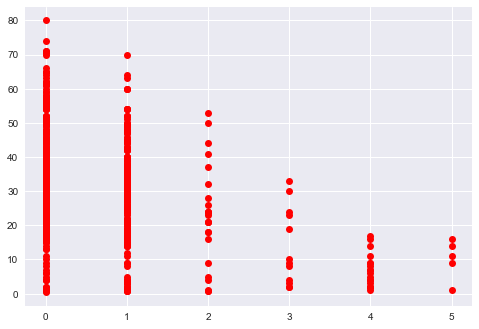

In [12]:
fig = plt.figure()
fig1 = fig.add_subplot(111)
cond = data['Age'].isnull() == False
x_values = data[cond]['SibSp'].values
y_values = data[cond]['Age'].values
print(set(x_values))
print(set(y_values))
fig1.plot(x_values, y_values, 'ro')
plt.show()

{0.75, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 28.5, 31.0, 32.0, 30.0, 34.0, 35.0, 33.0, 37.0, 38.0, 39.0, 40.0, 32.5, 42.0, 36.5, 40.5, 45.0, 46.0, 47.0, 44.0, 49.0, 50.0, 51.0, 45.5, 52.0, 54.0, 55.0, 55.5, 56.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 70.5, 71.0, 14.5, 70.0, 74.0, 80.0, 20.5, 23.5, 24.5, 0.41999999999999998, 30.5, 34.5, 36.0, 41.0, 43.0, 48.0, 0.82999999999999996, 0.92000000000000004, 0.67000000000000004, 53.0, 57.0}
{0, 1, 2, 3, 4, 5, 6}


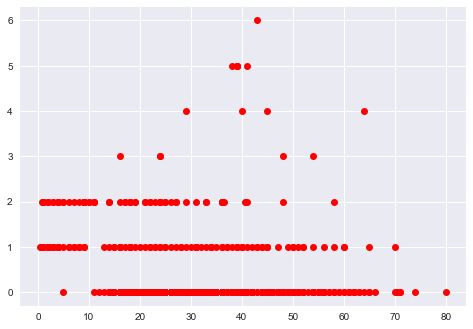

In [13]:
fig = plt.figure()
fig1 = fig.add_subplot(111)
cond = data['Age'].isnull() == False
y_values = data[cond]['Parch'].values
x_values = data[cond]['Age'].values
print(set(x_values))
print(set(y_values))
fig1.plot(x_values, y_values, 'ro')
plt.show()

## Fill the missing ages using Sibling Counts

In [14]:
data2 = data
data2['Age'] = data['Age'].fillna(data.groupby('SibSp')['Age'].transform('mean'))

In [15]:
print(data2.head(6))

   PassengerId  Survived  Pclass     Sex        Age  SibSp  Parch  \
0            1         0       3    male  22.000000      1      0   
1            2         1       1  female  38.000000      1      0   
2            3         1       3  female  26.000000      0      0   
3            4         1       1  female  35.000000      1      0   
4            5         0       3    male  35.000000      0      0   
5            6         0       3    male  31.397558      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  
5            330877   8.4583   NaN        Q  


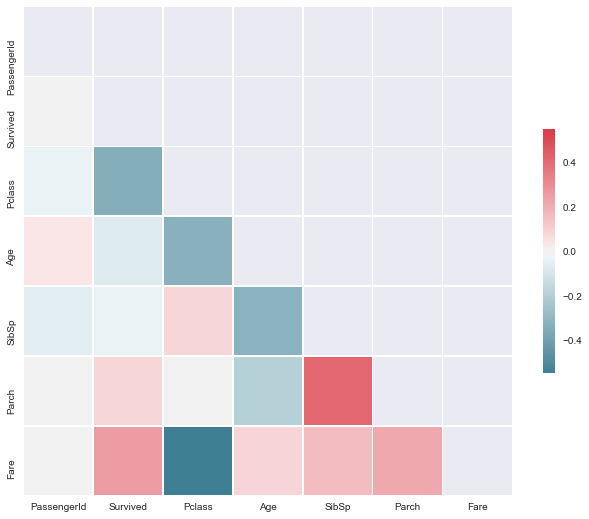

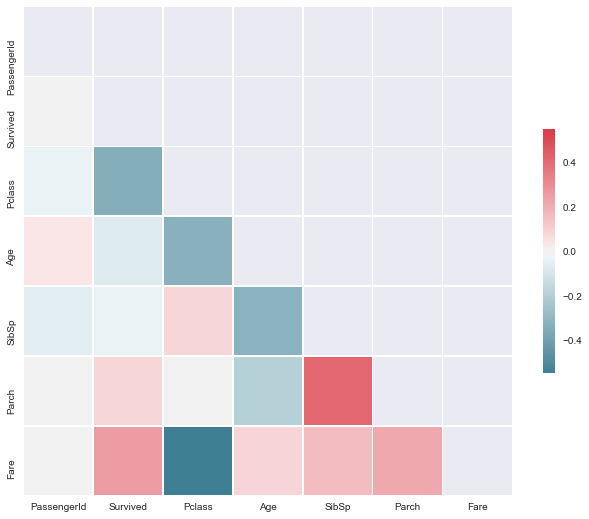

In [17]:
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [22]:
print(data2.shape)

(891, 11)


In [23]:
data2.drop('Cabin', axis=1, inplace=True)

In [25]:
print(data2.head(5))

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Embarked  
0         A/5 21171   7.2500        S  
1          PC 17599  71.2833        C  
2  STON/O2. 3101282   7.9250        S  
3            113803  53.1000        S  
4            373450   8.0500        S  


In [95]:
data2.dropna(subset=['Embarked'], inplace=True)

In [50]:
print(data2.isnull().values.any())

True


/Users/Cemal/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  app.launch_new_instance()


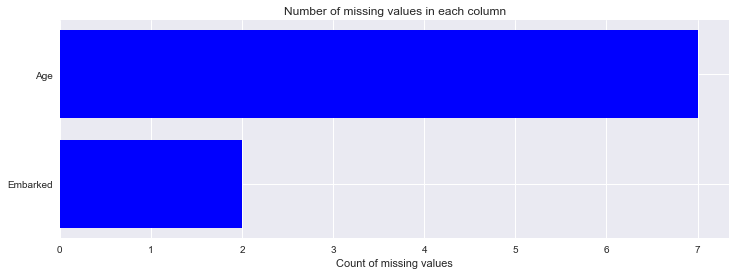

In [51]:
missing_df = data2.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,4))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

In [48]:
data2.iloc[863]

PassengerId         864
Survived              0
Pclass                3
Sex              female
Age                 NaN
SibSp                 8
Parch                 2
Ticket         CA. 2343
Fare              69.55
Embarked              S
Name: 863, dtype: object

In [89]:
data2['Age'].fillna(10, inplace = True)

In [90]:
data2.iloc[863]

PassengerId         864
Survived              0
Pclass                3
Sex              female
Age                  10
SibSp                 8
Parch                 2
Ticket         CA. 2343
Fare              69.55
Embarked              S
Name: 863, dtype: object

/Users/Cemal/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  app.launch_new_instance()


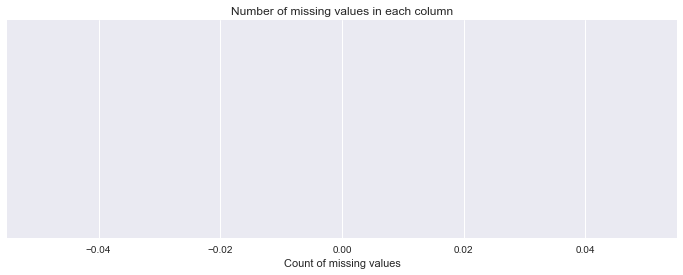

In [96]:
missing_df = data2.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,4))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

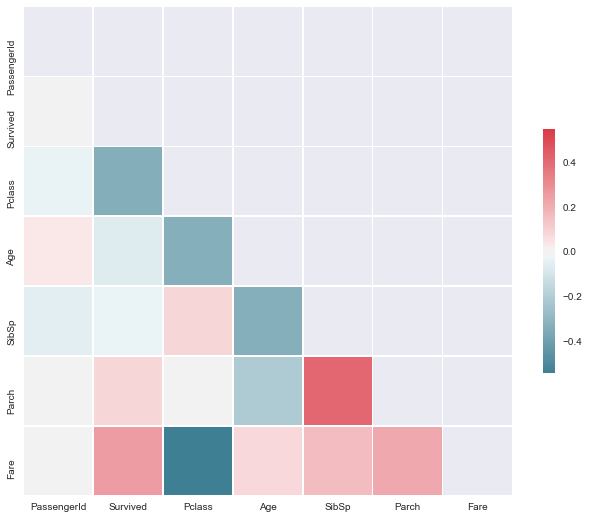

In [97]:
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [104]:
print(data2.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Embarked  
0         A/5 21171   7.2500        S  
1          PC 17599  71.2833        C  
2  STON/O2. 3101282   7.9250        S  
3            113803  53.1000        S  
4            373450   8.0500        S  
